# Does the Brain’s E/I Balance Really Shape Long-Range Temporal

Correlations?

Lydia Sochan [](https://orcid.org/0000-0003-2247-6870) (School of Biomedical Engineering, The University of British Columbia, Vancouver, BC, Canada)  
Alexander Mark Weber [](https://orcid.org/0000-0001-7295-0775) (School of Biomedical Engineering, The University of British Columbia, Vancouver, BC, Canada, BC Children’s Hospital Research Institute, The University of British Columbia, Vancouver, BC, Canada, Pediatrics, The University of British Columbia, Vancouver, BC, Canada)

<sup>1</sup> School of Biomedical Engineering, The University of British Columbia, Vancouver, BC, Canada  
<sup>2</sup> BC Children’s Hospital Research Institute, The University of British Columbia, Vancouver, BC, Canada  
<sup>3</sup> Pediatrics, The University of British Columbia, Vancouver, BC, Canada

<sup>✉</sup> Correspondence: [Alexander Mark Weber \<aweber@bcchr.ca\>](mailto:aweber@bcchr.ca)

In [ ]:
# options
knitr::opts_chunk$set(
  # fig.width=8, fig.height=5,
  # out.width="50%",
  # fig.align="center",
  echo=FALSE,
  message=FALSE,
  warning=FALSE
  # cache=TRUE
)
set.seed(1234) # reproducible
options(knitr.kable.NA = '') # how kable handles NA
options(reticulate.repl.quiet = TRUE)

In [ ]:
#libraries
library(tidyverse) # ggplot2, dplyr, tidyr, readr, purrr, tibble, stringr, forcats

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Linking to ImageMagick 6.9.11.60
Enabled features: fontconfig, freetype, fftw, heic, lcms, pango, webp, x11
Disabled features: cairo, ghostscript, raw, rsvg
Using 32 threads

In [ ]:
load("notebooks/results.RData")

## 0.1 Abstract

A 3T multimodal MRI study of healthy adults (n=19; 10 female; 21-54 years) was performed to investigate the potential link between fMRI long-range temporal correlations and excitatory/inhibitory balance. The study objective was to determine if the Hurst exponent (H) – an estimate of the self-correlation and signal complexity of the blood-oxygen-level-dependent (BOLD) signal – is correlated with the excitatory-inhibitory (E/I) ratio. Findings in this domain have implications for neurological and neuropsychiatric conditions with disrupted E/I balance, such as autism spectrum disorder, schizophrenia, and Alzheimer’s disease. From a methodological perspective, HE is also considerably easier to accurately measure than E/I ratio. If HE can serve as a proxy for E/I, it may serve as a useful clinical biomarker for E/I imbalance. Moreover, E/I has been proposed to serve as a control parameter for brain criticality, which HE is believed to be a measure of. Thus, understanding if HE and E/I are correlated would serve to clarify this relationship. The study collected movie-watching and rest data including fMRI – which was used to calculate HE – and magnetic resonance spectroscopy (MRS) – which was used to measure inhibitory and excitatory neurotransmitters – GABA and glutamate, respectively. HE was found to increase with movie compared to rest, while E/I did not change between conditions. HE and E/I were not correlated during either movie or rest. This study represents the first attempt to investigate this connection *in vivo* in humans. We conclude that, at 3T and with our particular methodologies, no association was found.

# 1. Introduction

Thirty years ago, functional magnetic resonance imaging (fMRI) profoundly changed the world of MRI by allowing real-time analysis of pressing neuropsychological questions<sup>[1](#ref-ogawaMagneticResonanceImaging1990)–[3](#ref-stephanShortHistoryCausal2012)</sup>. While initially used to probe task-based responses, researchers have more recently developed an interest in studying brain function at rest, known as resting-state fMRI (rs-fMRI)<sup>[4](#ref-decoRestingBrainsNever2013)</sup>, i.e. to understand how brain dynamics at rest are related to neurological functioning as well as individual differences. A critical tool in analyzing these dynamics is the Hurst exponent (H)<sup>[5](#ref-campbellMonofractalAnalysisFunctional2022)</sup>, a measure of self-similarity derived from the blood-oxygen-dependent (BOLD) signal. HE estimates the extent to which the BOLD signal displays long-term memory, where a higher value indicates a self-similar signal with long-term positive autocorrelations<sup>[5](#ref-campbellMonofractalAnalysisFunctional2022),[6](#ref-beggsBeingCriticalCriticality2012)</sup>. Another way of understanding HE is that a signal with high HE is fractal: similar temporal signal fluctuations are observed, no matter the time scale<sup>[5](#ref-campbellMonofractalAnalysisFunctional2022)</sup>.

HE has also emerged as a valuable tool in clinical research, capturing changes in BOLD signal dynamics across various neuropsychiatric conditions. In aging populations for instance, HE has been found to be elevated<sup>[7](#ref-dongHurstExponentAnalysis2018),[8](#ref-winkAgeCholinergicEffects2006)</sup>; this relationship has also been found in mild cognitive impairment and Alzheimer’s disease<sup>[9](#ref-maximFractionalGaussianNoise2005),[10](#ref-longBrainnetomeAtlasBased2018)</sup>. Additionally, changes in HE have been observed in conditions such as autism, mood disorders, and brain injury<sup>[11](#ref-laiShiftRandomnessBrain2010)–[15](#ref-donaFractalAnalysisBrain2017)</sup>. These differences suggest HE may reflect changes in global and local functioning.

Underlying these observations is the critical brain hypothesis, which posits that the brain operates at a critical point, a state where order and disorder are perfectly balanced to enable optimal information processing<sup>[4](#ref-decoRestingBrainsNever2013),[6](#ref-beggsBeingCriticalCriticality2012),[16](#ref-barangerChaosComplexityEntropy2000)–[27](#ref-rubinovNeurobiologicallyRealisticDeterminants2011)</sup>. When operating at a critical point, the brain is maximally sensitive to external stimuli, and can dynamically transition between ordered and disordered states to promote efficient cognitive processing<sup>[4](#ref-decoRestingBrainsNever2013),[6](#ref-beggsBeingCriticalCriticality2012),[26](#ref-tianTheoreticalFoundationsStudying2022),[27](#ref-rubinovNeurobiologicallyRealisticDeterminants2011)</sup>.Recent papers suggest the control parameter underlying the brain’s ability to transition between states is the excitatory-inhibitory (E/I) ratio, the balance of excitatory and inhibitory neural activity, often operationalized as the ratio of the primary excitatory-to-inhibitory neurotransmitters, i.e. glutamate-to-GABA ratio<sup>[19](#ref-liangExcitationInhibitionBalance2024),[21](#ref-lombardiBalanceExcitationInhibition2017)–[25](#ref-gaoInferringSynapticExcitation2017)</sup>. It is thought that E/I controls criticality by modulating the brain’s signal-to-noise ratio<sup>[19](#ref-liangExcitationInhibitionBalance2024),[28](#ref-rubensteinModelAutismIncreased2003)</sup>.

Besides the implications to the critical brain hypothesis, understanding if E/I is related to HE may allow for easier estimation of excitatory and inhibitory neurotransmitters, as accurate E/I measurement is technically challenging<sup>[29](#ref-ajramContribution1HMagnetic2019)</sup>. Magnetic resonance spectroscopy (MRS) is the only non-invasive method of measuring the ratio of glutamate (Glu; excitatory) to Gamma-aminobutyric acid (GABA; inhibitory) *in vivo*<sup>[30](#ref-stanleyFunctionalMagneticResonance2018)</sup>. Unfortunately, it has both limited spatial and temporal resolution<sup>[25](#ref-gaoInferringSynapticExcitation2017),[29](#ref-ajramContribution1HMagnetic2019),[30](#ref-stanleyFunctionalMagneticResonance2018)</sup>. Consequently, if HE could serve as a proxy for E/I, it would be much easier to estimate E/I in conditions of interest such as autism, Alzheimer’s, and schizophrenia.

There are a handful of studies suggesting a link between HE and E/I, however they are all either computational models or animal studies<sup>[19](#ref-liangExcitationInhibitionBalance2024)–[25](#ref-gaoInferringSynapticExcitation2017)</sup>. Moreover, their findings are inconsistent, with some reporting positive linear, negative linear, or U-shaped relationships between the two variables (see <a href="#tbl-lit" class="quarto-xref">Table 1</a>). Thus, there is a need for further study, both to clarify the nature of a potential E/I-Hurst relationship, and also to confirm if this relationship indeed exists in the human brain. Therefore, the current study seeks to investigate the potential E/I-Hurst relationship in vivo, within the visual cortex during movie-watching and rest.

| Citation | Study Type | HE Data Type | HE Calculation Method | E/I Type | E/I-Hurst Relationship |
|------------|-------------|-------------|------------|-------------|-------------|
| Poil et al. (2012)<sup>[20](#ref-poilCriticalStateDynamicsAvalanches2012)</sup> | Computational with in-house simulated model | Neuronal avalanche size | Detrendend fluctuation analysis (DFA) | Structural: number of E-to-I neurons | Inverse U |
| Bruining et al. (2020)<sup>[23](#ref-bruiningMeasurementExcitationinhibitionRatio2020)</sup> | Computational with model by Poil et al. (2012); modified in-house | Neuronal oscillation amplitude | DFA | Structural: number of E-to-I synapses | Inverse U |
| Gao et al. (2017)<sup>[25](#ref-gaoInferringSynapticExcitation2017)</sup> | Computational; in vivo in rats and macaques | Local field potential (LFP) | PSD | Estimated from LFP | Positive linear |
| Lombardi et al. (2017)<sup>[21](#ref-lombardiBalanceExcitationInhibition2017)</sup> | Computational with in-house model | Neuronal avalanche size | PSD | Structural: number of E-to-I neurons | Negative linear |
| Trakoshis et al. (2020)<sup>[24](#ref-trakoshisIntrinsicExcitationinhibitionImbalance)</sup> | Computational with simulated data; in vivo in mice | fMRI BOLD signal | Wavelet-based maximum likelihood method | E-to-I synaptic conductance | Positive linear |

**Table** 1**.** Summary of Methods for Existing E/I-Hurst Studies

# 2. Methods

## 2.1 Participants

Twenty-six healthy adult participants (11 M, age 21 – 53.4) took part in the study. After our analysis and performing quality assurance (see below), seven participants were removed for having less than ideal MRI data quality, leaving nineteen final participants, between the ages of 21.3 and 53.4 (mean age ± sd: 30.1 ± 8.7 years; 9 males).

## 2.2 Ethics Statement

Written informed consent was obtained from all participants. Ethics approval was granted by the Clinical Research Ethics Board at the University of British Columbia and BC Children’s & Women’s Hospital (H21-02686).

## 2.3 Scanning Procedure

After two anatomical sequences were acquired, participants were instructed to visually fixate on a cross-hair for 24 minutes. During this period, an fMRI, MEGA-PRESS, and sLASER sequence were acquired (see <a href="#fig-method" class="quarto-xref">Figure 1</a> A and <a href="#sec-mriacq" class="quarto-xref">Section 2.4</a>). Next, participants were instructed to watch a nature documetnary (Our Planet (2019), Episode 3, “Jungles”<sup>[31](#ref-cordeyJungles2019)</sup>) for 24 minutes. During this period, another set of fMRI, sLASER, and MEGA-PRESS sequences were acquired. See <a href="#fig-method" class="quarto-xref">Figure 1</a> B for a visual representation of the scanning protocol. Total scan duration was approximately 1 hour. All participants followed the same order of rest than movie, and all participants saw the same movie segment, beginning at the same time during the scan.

In [ ]:
fmrimrs <- image_read('../Figures/StudyDesign/studydesign_fmri_mrs.png')
fmrimrs_dim <- image_info(fmrimrs)

fmrimrs <- ggplot() + background_image(fmrimrs) + theme_void() +
  theme(aspect.ratio = fmrimrs_dim$height / fmrimrs_dim$width)
studydesign <- image_read('../Figures/StudyDesign/StudyDesign.png')
studydesign <- ggplot() + background_image(studydesign) + theme_void()
p <- (fmrimrs + plot_spacer()) / studydesign
p + plot_annotation(tag_levels = 'A') & theme(plot.tag = element_text(size = 11))

## 2.4 Acquisition Details

Scans were performed at BC Children’s Hospital MRI Research Facility on a 3.0 Tesla GE Discovery MR750 scanner (scanner software version: DV26.0_R03) with a Nova Medical 32 channel head coil. Participants changed into scrubs and were screened by an MRI technologist. Participants were given wax earplugs and a fiducial was placed on their left temple. Participants were provided with an audio headset and blanket once lying down on the scanner bed. Since visual stimuli were to be rear-projected, position and angle of mirror above patient eyes was adjusted for optimal movie viewing.

The following MRI scans were acquired. A 3D T1-weighted sagittal fast spoiled gradient echo (FSPGR) sequence: TE = 2.176 ms, TR = 7.216 ms, flip angle = 12, FOV = 256 x 256, slice thickness = 0.9 mm, and in-plane resolution = 0.9375 x 0.9375 mm<sup>2</sup>. A 3D T2-weighted sagittal CUBE (fast spin echo): TE = 75.242 ms, TR = 2,504.0 ms, slice thickness = 0.9 mm, and in-plane resolution = 0.9375 x 0.9375 mm<sup>2</sup>. A 2D echo-planar imaging (EPI) multi-echo gradient-echo fMRI sequence: 3 echoes, TE1 = 12.2 ms, TE2 = 35.352 ms, TE3 = 58.504 ms, TR = 1,500 ms, flip angle = 52, acceleration factor=6, in-plane resolution = 3.5938 x 3.5938 mm<sup>2</sup>, and slice thickness = 3.6 mm. A semi-LASER (sLASER) sequence: TE = 35 ms, TR = 2,000 ms, flip angle = 90, and FOV = 512 x 512. A MEGA-PRESS sequence: TE = 68 ms, TR = 1,800 ms, flip angle = 90, and FOV = 512 x 512. For both MRS sequences, the voxel size was set to 2.8 x 2.8 x 2.8 cm<sup>3</sup>. MRS voxels were rotated and placed in the occipital lobe, aligned along the calcarine fissure. Finally, blip-up and blip-down spin-echo versions of the fMRI sequence were acquired at the end to estimate the B0 non-uniformity map for fMRI phase distortion correction.

## 2.5 Image Processing

Our full image processing pipeline has been can be accessed from our Github account page: [github.com/WeberLab/EI_Hurst_Analysis](https://github.com/WeberLab/EI_Hurst_Analysis)

Images were downloaded offline from the scanner in raw Digital Imaging and Communications in Medicine (DICOM) format. DICOM files were then converted to Neuroimaging Informatics Technology Initiative (NIfTI) using Chris Rorden’s `dcm2niix`<sup>[32](#ref-liFirstStepNeuroimaging2016)</sup> (v1.0.20211006) and then to Brain Imaging Data Structure (BIDS)<sup>[33](#ref-gorgolewskiBrainImagingData2016)</sup> format using `dcm2bids`<sup>[34](#ref-boreDcm2Bids2023)</sup> (v2.1.6).

### 2.5.1 Structural Images

The T1w image was corrected for intensity non-uniformity with `N4BiasFieldCorrection`<sup>[35](#ref-tustisonN4ITKImprovedN32010)</sup> and distributed using `ANTs`<sup>[36](#ref-avantsSymmetricDiffeomorphicImage2008)</sup> (v2.3.335) to be used as a T1w-reference for the rest of the workflow. The T1w-reference was skull-stripped using a `Nipype`<sup>[37](#ref-gorgolewskiNipypeFlexibleLightweight2016)</sup> implementation of `antsBrainExtraction.sh` from `ANTs`; `OASIS30ANTs` was used as a target template. `Fast`<sup>[38](#ref-zhangSegmentationBrainMR2001)</sup> (`FSL`<sup>[39](#ref-smithAdvancesFunctionalStructural2004)</sup> v.6.0.5.1:57b01774, RRID: SCR_002823) was used for brain tissue segmentation into cerebrospinal fluid (CSF), white matter (WM), and gray matter (GM). Brain surfaces were reconstructed with `recon-all`<sup>[40](#ref-daleCorticalSurfacebasedAnalysis1999)</sup> (`FreeSurfer`<sup>[40](#ref-daleCorticalSurfacebasedAnalysis1999)</sup> 7.3.2, RRID: SCR_001847). The previously-estimated brain mask was refined with `Mindboggle`<sup>[41](#ref-kleinMindbogglingMorphometryHuman2017)</sup> (RRID:SCR_002438) to reconcile ANTs-derived and FreeSurfer-derived segmentations of cortical GM. `AntsRegistration`<sup>[36](#ref-avantsSymmetricDiffeomorphicImage2008)</sup> (`ANTs` 2.3.3) was used to perform volume-based spatial normalization to two standard spaces: MNI152NLin2009cAsym and MNI152NLin6Asym. Normalization used brain-extracted versions of both T1w reference and T1w template.

### 2.5.2 fMRI

Using `fMRIPrep`<sup>[42](#ref-estebanFMRIPrepRobustPreprocessing2019)</sup>, the shortest echo of the BOLD run was used to generate a reference volume (both skull-stripped and skull-included). Head-motion parameters with respect to the BOLD reference (transformation matrices as well as six corresponding rotation and translation parameters) were estimated before spatiotemporal filtering using `mcflirt`<sup>[43](#ref-jenkinsonImprovedOptimizationRobust2002)</sup> (`FSL` v6.0.5.1:57b01774). The fieldmap was aligned with rigid registration to the target EPI reference run. Field coefficients were mapped to the reference EPI using the transform. BOLD runs were slice-time corrected to 643 ms (half of slice acquisition range of 0-1290 ms) using `3dTshift` from `AFNI`<sup>[44](#ref-coxAFNISoftwareAnalysis1996)</sup> (RRIS: SCR_005927). To estimate T2\* map from preprocessed EPI echoes, a voxel-wise fitting was performed by fitting the maximum number of echoes with reliable echoes in a particular voxel to a monoexponential signal decay model with nonlinear regression. Initial values were T2*/S0 estimates from a log-linear regression fit. This calculated T2* map was then used to optimally combine preprocessed BOLD across echoes using the method by Posse et al. (1999)<sup>[45](#ref-posseEnhancementBOLDcontrastSensitivity1999)</sup>. The generated BOLD reference was then co-registered (6 degrees of freedom) to the T1w reference with `bbregister` (`FreeSurfer`<sup>[40](#ref-daleCorticalSurfacebasedAnalysis1999)</sup>) using boundary-based registration. First, a reference volume and its skull-stripped equivalent were generated with `fMRIPrep`. Confounding time series were calculated from preprocessed BOLD: framewise displacement (FD), DVARS, and three region-wise global signals. `Tedana`<sup>[46](#ref-dupreTEdependentAnalysisMultiecho2021)</sup> was then used to denoise the data by decomposing the multi-echo BOLD data via principal component analysis (PCA) and independent component analysis (ICA). The resulting components are automatically analyzed to determine whether they are TE-dependent or -independent. TE-dependent components were classified as BOLD, while TE-independent components were classified as non-BOLD and were discarded as part of data cleaning.

## 2.6 MRS

sLASER data were processed and fit to a spectrum using `Osprey`<sup>[47](#ref-oeltzschnerOspreyOpenSourceProcessing2020)</sup> (v2.4.0). Full width half-maximum (FWHM) of the single-Lorentzian fit of the N-acetylaspartate (NAA) peak were calculated for quality assurance purposes. The MRS voxel was coregistered to T1w reference image and segmented by SPM12<sup>[48](#ref-fristonStatisticalParametricMapping2007)</sup> into CSF, GM, and WM. Metabolites were water-scaled as well as tissue- and relaxation-corrected by the Gasparovic et al. (2006) method<sup>[49](#ref-gasparovicUseTissueWater2006)</sup>. Processed (non-fitted) data from `Osprey` was also fed to `LCModel`<sup>[50](#ref-provencherAutomaticQuantitationLocalized2001)</sup> (v6.1) for fitting. Cramer-Rao lower bounds (CRLBs) were calculated from LCModel fit. `Osprey` estimates were used for further analysis. Glutamate is challenging to capture due to its signal overlaps with other metabolites<sup>[51](#ref-pasantaFunctionalMRSStudies2023)</sup>. In particular, Glu shares a similar chemical structure with glutamine (Gln) which causes the spectral features of Glu to be contaminated with Gln<sup>[52](#ref-ramadanGlutamateGlutamineReview2013)</sup>. As a result, we decided to report Glx values, which co-reports Glu and Gln to avoid errors in spectral assignment, especially since it is controversial whether Glu can reliably be separated from Gln at 3T<sup>[51](#ref-pasantaFunctionalMRSStudies2023),[52](#ref-ramadanGlutamateGlutamineReview2013)</sup>. We henceforth refer to Glu as either Glx or glutamate. <!-- Does this make sense? -->

MEGA-PRESS data were processed and fit with `Osprey` and `LCModel` as previously described (see Figure 5). Data were also fit with `Gannet` (v3.3.0); they were relaxation-, tissue- and alpha-corrected using the Harris et al. (2015) method<sup>[53](#ref-harrisSpectralEditingMeasurementsGABA2015)</sup>. `Osprey` values were ultimately used for further analysis. Due to the J-editing sequence of MEGA-PRESS, a challenge of GABA quantification is macromolecule quantification<sup>[53](#ref-harrisSpectralEditingMeasurementsGABA2015)</sup>. As a result, we report GABA+, a measure which co-reports GABA with macromolecules. Macromolecules (MM) are expected to account for approximately 45% of the GABA+ signal<sup>[53](#ref-harrisSpectralEditingMeasurementsGABA2015)</sup>. While a macromolecule-suppressed estimate of GABA seems ideal, a recent 25-site and multi-vendor study conducted at 3T found that GABA+ showed much lower coefficient of variation than MM-suppressed GABA, meaning that GABA+ is more consistent across research sites and MRI vendors (i.e., Philips, GE, Siemens)<sup>[54](#ref-mikkelsenBigGABAII2019)</sup>. Moreover, GABA+ showed greater reliability for both creatine-referenced and water-suppressed estimates<sup>[54](#ref-mikkelsenBigGABAII2019),[55](#ref-mikkelsenBigGABAEdited2017)</sup>. MM-supressed GABA and GABA+ estimates are also correlated, albeit weakly- to moderately-so<sup>[53](#ref-harrisSpectralEditingMeasurementsGABA2015)–[55](#ref-mikkelsenBigGABAEdited2017)</sup>. Consequently, we report GABA+ (henceforth referred to as GABA) to allow for easier comparison of our results to other studies as well as reproducibility.

Basis sets were created using `MRSCloud`<sup>[56](#ref-huiMRSCloudCloudbasedMRS2022),[57](#ref-moriMRICloudDeliveringHighThroughput2016)</sup>. For sLASER, ‘localization’ was set to ‘sLASER’, ‘vendor’ to ‘GE’, ‘editing’ to ‘UnEdited’, and ‘TE’ to 35. For MEGA-PRESS, ‘localization’ was set to ‘PRESS’, ‘editing’ to ‘MEGA’, ‘TE’ to 68, ‘edit on’ to ‘1.9’, ‘edit off’ to ‘7.5’, and ‘pulse duration’ to ‘14’. Metabolites included for both basis sets were: Asc, Asp, Cr, CrCH2, EA, GABA, GPC, GSH, Gln, Glu, Gly, H2O, Lac, NAA, NAAG, PCh, PCr, PE, Ser, Tau, mI, and sI. Excitatory-inhibitory ratio (E/I) was calculated as \[Glx in i.u.\]/\[GABA+ in i.u.\], a common practice to report E/I using MRS<sup>[58](#ref-rideauxNoBalanceGlutamate+glutamine2021)</sup>.

## 2.7 Hurst Exponent Calculation

Hurst exponent was calculated from the power spectrum density (PSD) of the BOLD signal. A log-log plot was used, where log power was plotted against log frequency; generally, if a log-log plot results in a linear relationship, it is assumed that the mean slope of this line represents the power-law exponent<sup>[18](#ref-zimmernWhyBrainCriticality2020)</sup>. A PSD shows the distribution of signal variance (‘power’) across frequencies. Complex signals are classified into two categories: fractional Gaussian noise (fGn) and fractional Brownian motion (fBm)<sup>[59](#ref-duffPowerSpectralDensity2008),[60](#ref-ekeFractalCharacterizationComplexity2002)</sup>. The former is a stationary signal (i.e., does not vary over time), while the latter is non-stationary with stationary increments<sup>[60](#ref-ekeFractalCharacterizationComplexity2002)</sup>. Most physiological signals consist of fBm, but fMRI BOLD is typically conceptualized as fGn once motion-corrected; otherwise put, unprocessed BOLD signal is initially fBm which is converted to fGn with appropriate processing<sup>[61](#ref-bullmoreWaveletsFunctionalMagnetic2004)</sup>. fBm and fGn require distinct H calculation methods<sup>[60](#ref-ekeFractalCharacterizationComplexity2002)</sup>. PSD was estimated using Welch’s method<sup>[62](#ref-welchUseFastFourier1967)</sup> from the Python `Scipy.Signal` library<sup>[63](#ref-virtanenSciPy10Fundamental2020)</sup>. Data were divided into 8 windows of 50% overlap and averaged. The spectral index, , was calculated from the full frequency spectrum. The spectral index was then converted to H using the following equation<sup>[60](#ref-ekeFractalCharacterizationComplexity2002),[64](#ref-schaeferComparativeAnalysisSpectral2014)</sup>:

$$
H = \frac{1 + \beta}{2}
$$

Since it cannot be assumed that all fBm is removed from the signal, we use the concept of ‘extended Hurst’ (H’) in this study: for 0 \< H \< 1, the signal is understood as fGn, while for 1 \< H \< 2, the signal is assumed to be fBm<sup>[65](#ref-campbellFractalBasedAnalysisFMRI2022)</sup>. More generally, it is also assumed that when 0.5 \< H \< 1.5, the signal displays 1/f behaviour<sup>[18](#ref-zimmernWhyBrainCriticality2020)</sup>.H was calculated for all voxels in the brain of each subject. A brain mask was then applied which included only GM and the region of the MRS voxel in the visual cortex (see <a href="#fig-fmrigreyvoxel" class="quarto-xref">Figure 2</a>). H was averaged across the brain mask area, using only non-zero voxels.

``` python
#slice_cut = [slice(-91,60), slice(-60,51), slice(None)]

nii_gz_relpath = 'derivatives/tedana/sub-Pilot10/rest/desc-optcomDenoised_bold.nii.gz'
nii_gz_path = basepath + nii_gz_relpath

nii_img = nib.load(nii_gz_path)
nii_img = nl.image.crop_img(nii_img)

overlay_relpath = 'derivatives/hurst/sub-Pilot10/rest/gm_voxel_mask_space-BOLD_rest.nii.gz'
overlay_path = basepath + overlay_relpath

overlay_img = nib.load(overlay_path)

# Set the number of rows and columns for the subplot grid

fmrimrsgm = plot_epi(mean_img(nii_img, 
    copy_header=True), 
    cbar_tick_format="%i", 
    cmap=plt.cm.gray, 
    black_bg=False, 
    draw_cross=False,
    annotate=True,
    #cut_coords=(-1,-68,14),
    cut_coords=(-1,-68,14),
    #radiological=True,
    figure=plt.figure(figsize=(10,4)))

redcolors = ['red']
custom_cmapred = ListedColormap(redcolors)

fmrimrsgm.add_overlay(overlay_img, cmap=custom_cmapred)

plt.savefig(figpath + "SampleMask.png", dpi=300, bbox_inches="tight")

plt.show()
```

    /tmp/ipykernel_1578265/4113964360.py:13: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
      nii_img = nl.image.crop_img(nii_img)

<figure id="fig-fmrigreyvoxel">
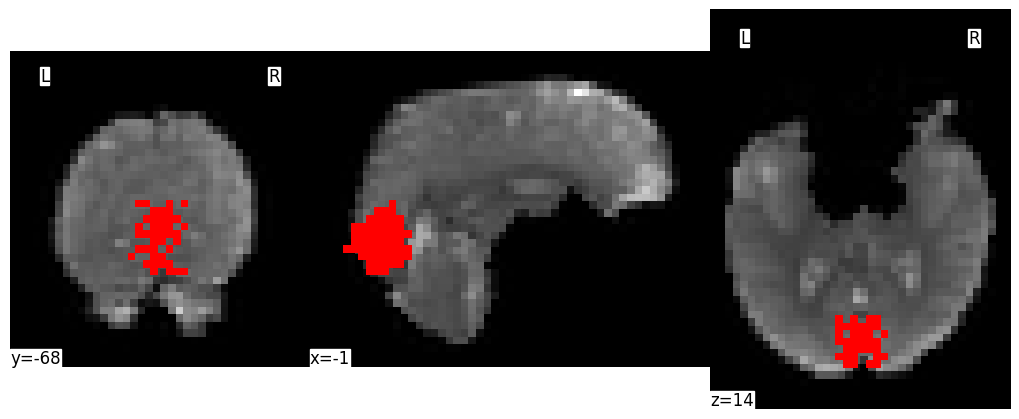
<figcaption><strong>Figure</strong> 2<strong>.</strong> <strong>A sample fMRI grey-matter mask within the MRS voxel.</strong> Background: a sample coronal, sagittal, and axial slice is displayed of the mean fMRI scan from the rest acquisition. Foreground: the greymatter/MRS mask used to calculate mean H.</figcaption>
</figure>

## 2.8 Statistics

All statistical analyses were performed using `R`<sup>[66](#ref-rcoreteamLanguageEnvironmentStatistical2021)</sup> and `RStudio` (v2023.06.0+421). Glutamate, GABA, E/I ratio, and H were compared between rest and movie conditions using paired Student’s t-tests<sup>[67](#ref-studentProbableErrorMean1908)</sup>. Glutamate, GABA, and E/I ratio were tested for correlation with HE using Pearson’s method<sup>[68](#ref-freedmanStatistics2007)</sup>.

# 3. Results

## 3.1 Image Quality

An average of all MRS voxel placements can be seen in <a href="#fig-mrsquality" class="quarto-xref">Figure 3</a> A.

In [ ]:
mrsvoxel <- image_read('./images/MRSVoxelAverage.png')
mrsvoxel <- ggplot() + background_image(mrsvoxel) + theme_void()

ospreyslaser <- image_read('../Data_from_BCCHRI/derivatives/slaser/sub-Pilot10/rest/Reports/reportFigures/sub-Pilot10/sub-Pilot10_metab_A_model.jpg')
ospreyslaser_dim <- image_info(ospreyslaser)

ospreyslaser <- ggplot() + background_image(ospreyslaser) + theme_void() +
  theme(aspect.ratio = ospreyslaser_dim$height / ospreyslaser_dim$width)
ospreymegapress <- image_read('../Data_from_BCCHRI/derivatives/megapress/sub-Pilot10/rest_osprey/Reports/reportFigures/sub-Pilot10/sub-Pilot10_metab_diff1_model.jpg')
ospreymegapress <- ggplot() + background_image(ospreymegapress) + theme_void()
p1 <- mrsvoxel / (ospreyslaser + ospreymegapress)
p1 + plot_annotation(tag_levels = 'A') & theme(plot.tag = element_text(size = 11))

<span class="csl-left-margin">1. </span><span class="csl-right-inline">Ogawa, S. & Lee, T.-M. [Magnetic resonance imaging of blood vessels at high fields: In vivo and in vitro measurements and image simulation](https://doi.org/10.1002/mrm.1910160103). *Magnetic Resonance in Medicine* **16**, 9–18 (1990).</span>

<span class="csl-left-margin">2. </span><span class="csl-right-inline">Ogawa, S., Lee, T. M., Kay, A. R. & Tank, D. W. [Brain magnetic resonance imaging with contrast dependent on blood oxygenation.](https://doi.org/10.1073/pnas.87.24.9868) *Proceedings of the National Academy of Sciences* **87**, 9868–9872 (1990).</span>

<span class="csl-left-margin">3. </span><span class="csl-right-inline">Stephan, K. E. & Roebroeck, A. [A short history of causal modeling of <span class="nocase">fMRI</span> data](https://doi.org/10.1016/j.neuroimage.2012.01.034). *NeuroImage* **62**, 856–863 (2012).</span>

<span class="csl-left-margin">4. </span><span class="csl-right-inline">Deco, G., Jirsa, V. K. & McIntosh, A. R. [Resting brains never rest: Computational insights into potential cognitive architectures](https://doi.org/10.1016/j.tins.2013.03.001). *Trends in Neurosciences* **36**, 268–274 (2013).</span>

<span class="csl-left-margin">5. </span><span class="csl-right-inline">Campbell, O. L. & Weber, A. M. [Monofractal analysis of functional magnetic resonance imaging: An introductory review](https://doi.org/10.1002/hbm.25801). *Human Brain Mapping* **43**, 2693–2706 (2022).</span>

<span class="csl-left-margin">6. </span><span class="csl-right-inline">Beggs, J. & Timme, N. Being Critical of Criticality in the Brain. *Frontiers in Physiology* **3**, (2012).</span>

<span class="csl-left-margin">7. </span><span class="csl-right-inline">Dong, J. *et al.* Hurst Exponent Analysis of <span class="nocase">Resting-State fMRI Signal Complexity</span> across the Adult Lifespan. *Frontiers in Neuroscience* **12**, (2018).</span>

<span class="csl-left-margin">8. </span><span class="csl-right-inline">Wink, A. M., Bernard, F., Salvador, R., Bullmore, E. & Suckling, J. [Age and cholinergic effects on hemodynamics and functional coherence of human hippocampus](https://doi.org/10.1016/j.neurobiolaging.2005.08.011). *Neurobiology of Aging* **27**, 1395–1404 (2006).</span>

<span class="csl-left-margin">9. </span><span class="csl-right-inline">Maxim, V. *et al.* [Fractional Gaussian noise, functional MRI and Alzheimer’s disease](https://doi.org/10.1016/j.neuroimage.2004.10.044). *NeuroImage* **25**, 141–158 (2005).</span>

<span class="csl-left-margin">10. </span><span class="csl-right-inline">Long, Z. *et al.* [A Brainnetome Atlas Based Mild Cognitive Impairment Identification Using Hurst Exponent](https://doi.org/10.3389/fnagi.2018.00103). *Frontiers in Aging Neuroscience* **10**, 103 (2018).</span>

<span class="csl-left-margin">11. </span><span class="csl-right-inline">Lai, M.-C. *et al.* [A Shift to Randomness of Brain Oscillations in People with Autism](https://doi.org/10.1016/j.biopsych.2010.06.027). *Biological Psychiatry* **68**, 1092–1099 (2010).</span>

<span class="csl-left-margin">12. </span><span class="csl-right-inline">Dona, O., Hall, G. B. & Noseworthy, M. D. [Temporal fractal analysis of the rs-BOLD signal identifies brain abnormalities in autism spectrum disorder](https://doi.org/10.1371/journal.pone.0190081). *PLOS ONE* **12**, e0190081 (2017).</span>

<span class="csl-left-margin">13. </span><span class="csl-right-inline">Wei, M. *et al.* [Identifying major depressive disorder using Hurst exponent of resting-state brain networks](https://doi.org/10.1016/j.pscychresns.2013.09.008). *Psychiatry Research: Neuroimaging* **214**, 306–312 (2013).</span>

<span class="csl-left-margin">14. </span><span class="csl-right-inline">Jing, B. *et al.* [Identifying current and remitted major depressive disorder with the Hurst exponent: A comparative study on two automated anatomical labeling atlases](https://doi.org/10.18632/oncotarget.19860). *Oncotarget* **8**, 90452–90464 (2017).</span>

<span class="csl-left-margin">15. </span><span class="csl-right-inline">Dona, O., Noseworthy, M. D., DeMatteo, C. & Connolly, J. F. [Fractal Analysis of Brain Blood Oxygenation Level Dependent (BOLD) Signals from Children with Mild Traumatic Brain Injury (<span class="nocase">mTBI</span>)](https://doi.org/10.1371/journal.pone.0169647). *PLOS ONE* **12**, e0169647 (2017).</span>

<span class="csl-left-margin">16. </span><span class="csl-right-inline">Baranger, M. Chaos, Complexity, and Entropy: A physics talk for non-physicists. *New England Complex Systems Institute* (2000).</span>

<span class="csl-left-margin">17. </span><span class="csl-right-inline">Bassett, D. S. & Gazzaniga, M. S. [Understanding complexity in the human brain](https://doi.org/10.1016/j.tics.2011.03.006). *Trends in cognitive sciences* **15**, 200–209 (2011).</span>

<span class="csl-left-margin">18. </span><span class="csl-right-inline">Zimmern, V. Why Brain Criticality Is Clinically Relevant: A Scoping Review. *Frontiers in Neural Circuits* **14**, (2020).</span>

<span class="csl-left-margin">19. </span><span class="csl-right-inline">Liang, J., Yang, Z. & Zhou, C. Excitation–Inhibition Balance, Neural Criticality, and Activities in Neuronal Circuits. *The Neuroscientist* 10738584231221766 (2024) doi:[10.1177/10738584231221766](https://doi.org/10.1177/10738584231221766).</span>

<span class="csl-left-margin">20. </span><span class="csl-right-inline">Poil, S.-S., Hardstone, R., Mansvelder, H. D. & Linkenkaer-Hansen, K. [Critical-State Dynamics of Avalanches and Oscillations Jointly Emerge from Balanced Excitation/Inhibition in Neuronal Networks](https://doi.org/10.1523/JNEUROSCI.5990-11.2012). *Journal of Neuroscience* **32**, 9817–9823 (2012).</span>

<span class="csl-left-margin">21. </span><span class="csl-right-inline">Lombardi, F., Herrmann, H. J. & de Arcangelis, L. [Balance of excitation and inhibition determines 1/f power spectrum in neuronal networks](https://doi.org/10.1063/1.4979043). *Chaos: An Interdisciplinary Journal of Nonlinear Science* **27**, 047402 (2017).</span>

<span class="csl-left-margin">22. </span><span class="csl-right-inline">Baumgarten, L. & Bornholdt, S. [Critical excitation-inhibition balance in dense neural networks](https://doi.org/10.1103/PhysRevE.100.010301). *Physical Review E* **100**, 010301 (2019).</span>

<span class="csl-left-margin">23. </span><span class="csl-right-inline">Bruining, H. *et al.* [Measurement of excitation-inhibition ratio in autism spectrum disorder using critical brain dynamics](https://doi.org/10.1038/s41598-020-65500-4). *Scientific Reports* **10**, 9195 (2020).</span>

<span class="csl-left-margin">24. </span><span class="csl-right-inline">Trakoshis, S. *et al.* [Intrinsic excitation-inhibition imbalance affects medial prefrontal cortex differently in autistic men versus women](https://doi.org/10.7554/eLife.55684). *eLife* **9**, e55684.</span>

<span class="csl-left-margin">25. </span><span class="csl-right-inline">Gao, R., Peterson, E. J. & Voytek, B. [Inferring synaptic excitation/inhibition balance from field potentials](https://doi.org/10.1016/j.neuroimage.2017.06.078). *NeuroImage* **158**, 70–78 (2017).</span>

<span class="csl-left-margin">26. </span><span class="csl-right-inline">Tian, Y. *et al.* [Theoretical foundations of studying criticality in the brain](https://doi.org/10.1162/netn_a_00269). *Network Neuroscience* **6**, 1148–1185 (2022).</span>

<span class="csl-left-margin">27. </span><span class="csl-right-inline">Rubinov, M., Sporns, O., Thivierge, J.-P. & Breakspear, M. [Neurobiologically Realistic Determinants of Self-Organized Criticality in Networks of Spiking Neurons](https://doi.org/10.1371/journal.pcbi.1002038). *PLOS Computational Biology* **7**, e1002038 (2011).</span>

<span class="csl-left-margin">28. </span><span class="csl-right-inline">Rubenstein, J. L. R. & Merzenich, M. M. [Model of autism: Increased ratio of excitation/inhibition in key neural systems](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6748642). *Genes, brain, and behavior* **2**, 255–267 (2003).</span>

<span class="csl-left-margin">29. </span><span class="csl-right-inline">Ajram, L. A. *et al.* [The contribution of \[1H\] magnetic resonance spectroscopy to the study of excitation-inhibition in autism](https://doi.org/10.1016/j.pnpbp.2018.09.010). *Progress in Neuro-Psychopharmacology and Biological Psychiatry* **89**, 236–244 (2019).</span>

<span class="csl-left-margin">30. </span><span class="csl-right-inline">Stanley, J. A. & Raz, N. [Functional Magnetic Resonance Spectroscopy: The “New” MRS for Cognitive Neuroscience and Psychiatry Research](https://doi.org/10.3389/fpsyt.2018.00076). *Frontiers in Psychiatry* **9**, 76 (2018).</span>

<span class="csl-left-margin">31. </span><span class="csl-right-inline">Cordey, H. Jungles. *Our Planet* (2019).</span>

<span class="csl-left-margin">32. </span><span class="csl-right-inline">Li, X., Morgan, P. S., Ashburner, J., Smith, J. & Rorden, C. [The first step for neuroimaging data analysis: DICOM to NIfTI conversion](https://doi.org/10.1016/j.jneumeth.2016.03.001). *Journal of Neuroscience Methods* **264**, 47–56 (2016).</span>

<span class="csl-left-margin">33. </span><span class="csl-right-inline">Gorgolewski, K. J. *et al.* [The brain imaging data structure, a format for organizing and describing outputs of neuroimaging experiments](https://doi.org/10.1038/sdata.2016.44). *Scientific Data* **3**, 160044 (2016).</span>

<span class="csl-left-margin">34. </span><span class="csl-right-inline">Boré, A., Guay, S., Bedetti, C., Meisler, S. & GuenTher, N. Dcm2Bids. (2023) doi:[10.5281/zenodo.8436509](https://doi.org/10.5281/zenodo.8436509).</span>

<span class="csl-left-margin">35. </span><span class="csl-right-inline">Tustison, N. J. *et al.* [N4ITK: Improved N3 Bias Correction](https://doi.org/10.1109/TMI.2010.2046908). *IEEE Transactions on Medical Imaging* **29**, 1310–1320 (2010).</span>

<span class="csl-left-margin">36. </span><span class="csl-right-inline">Avants, B. B., Epstein, C. L., Grossman, M. & Gee, J. C. [Symmetric diffeomorphic image registration with cross-correlation: Evaluating automated labeling of elderly and neurodegenerative brain](https://doi.org/10.1016/j.media.2007.06.004). *Medical Image Analysis* **12**, 26–41 (2008).</span>

<span class="csl-left-margin">37. </span><span class="csl-right-inline">Gorgolewski, K. J. *et al.* Nipype: A flexible, lightweight and extensible neuroimaging data processing framework in Python. 0.12.0-Rc1. (2016) doi:[10.5281/zenodo.50186](https://doi.org/10.5281/zenodo.50186).</span>

<span class="csl-left-margin">38. </span><span class="csl-right-inline">Zhang, Y., Brady, M. & Smith, S. [Segmentation of brain MR images through a hidden Markov random field model and the expectation-maximization algorithm](https://doi.org/10.1109/42.906424). *IEEE Transactions on Medical Imaging* **20**, 45–57 (2001).</span>

<span class="csl-left-margin">39. </span><span class="csl-right-inline">Smith, S. M. *et al.* [Advances in functional and structural MR image analysis and implementation as FSL](https://doi.org/10.1016/j.neuroimage.2004.07.051). *NeuroImage* **23 Suppl 1**, S208–219 (2004).</span>

<span class="csl-left-margin">40. </span><span class="csl-right-inline">Dale, A. M., Fischl, B. & Sereno, M. I. [Cortical surface-based analysis. I. Segmentation and surface reconstruction](https://doi.org/10.1006/nimg.1998.0395). *NeuroImage* **9**, 179–194 (1999).</span>

<span class="csl-left-margin">41. </span><span class="csl-right-inline">Klein, A. *et al.* [Mindboggling morphometry of human brains](https://doi.org/10.1371/journal.pcbi.1005350). *PLoS computational biology* **13**, e1005350 (2017).</span>

<span class="csl-left-margin">42. </span><span class="csl-right-inline">Esteban, O. *et al.* [<span class="nocase">fMRIPrep</span>: A robust preprocessing pipeline for functional MRI](https://doi.org/10.1038/s41592-018-0235-4). *Nature Methods* **16**, 111–116 (2019).</span>

<span class="csl-left-margin">43. </span><span class="csl-right-inline">Jenkinson, M., Bannister, P., Brady, M. & Smith, S. [Improved optimization for the robust and accurate linear registration and motion correction of brain images](https://doi.org/10.1016/s1053-8119(02)91132-8). *NeuroImage* **17**, 825–841 (2002).</span>

<span class="csl-left-margin">44. </span><span class="csl-right-inline">Cox, R. W. [AFNI: Software for Analysis and Visualization of Functional Magnetic Resonance Neuroimages](https://doi.org/10.1006/cbmr.1996.0014). *Computers and Biomedical Research* **29**, 162–173 (1996).</span>

<span class="csl-left-margin">45. </span><span class="csl-right-inline">Posse, S. *et al.* [Enhancement of <span class="nocase">BOLD-contrast</span> sensitivity by single-shot multi-echo functional MR imaging](https://doi.org/10.1002/(sici)1522-2594(199907)42:1<87::aid-mrm13>3.0.co;2-o). *Magnetic Resonance in Medicine* **42**, 87–97 (1999).</span>

<span class="csl-left-margin">46. </span><span class="csl-right-inline">DuPre, E. *et al.* [<span class="nocase">TE-dependent</span> analysis of multi-echo <span class="nocase">fMRI</span> with \*tedana\*](https://doi.org/10.21105/joss.03669). *Journal of Open Source Software* **6**, 3669 (2021).</span>

<span class="csl-left-margin">47. </span><span class="csl-right-inline">Oeltzschner, G. *et al.* [Osprey: Open-Source Processing, Reconstruction & Estimation of Magnetic Resonance Spectroscopy Data](https://doi.org/10.1016/j.jneumeth.2020.108827). *Journal of neuroscience methods* **343**, 108827 (2020).</span>

<span class="csl-left-margin">48. </span><span class="csl-right-inline">Friston, K., Ashburner, J., Kiebel, S., Nichols, T. & Penny, W. *Statistical Parametric Mapping: The Analysis of Functional Brain Images*. (Elsevier Ltd., 2007).</span>

<span class="csl-left-margin">49. </span><span class="csl-right-inline">Gasparovic, C. *et al.* [Use of tissue water as a concentration reference for proton spectroscopic imaging](https://doi.org/10.1002/mrm.20901). *Magnetic Resonance in Medicine* **55**, 1219–1226 (2006).</span>

<span class="csl-left-margin">50. </span><span class="csl-right-inline">Provencher, S. W. [Automatic quantitation of localized in vivo 1H spectra with LCModel](https://doi.org/10.1002/nbm.698). *NMR in biomedicine* **14**, 260–264 (2001).</span>

<span class="csl-left-margin">51. </span><span class="csl-right-inline">Pasanta, D. *et al.* [Functional MRS studies of GABA and glutamate/Glx – A systematic review and meta-analysis](https://doi.org/10.1016/j.neubiorev.2022.104940). *Neuroscience & Biobehavioral Reviews* **144**, 104940 (2023).</span>

<span class="csl-left-margin">52. </span><span class="csl-right-inline">Ramadan, S., Lin, A. & Stanwell, P. [Glutamate and Glutamine: A Review of In Vivo MRS in the Human Brain](https://doi.org/10.1002/nbm.3045). *NMR in biomedicine* **26**, 10.1002/nbm.3045 (2013).</span>

<span class="csl-left-margin">53. </span><span class="csl-right-inline">Harris, A. D., Puts, N. A. J., Barker, P. B. & Edden, R. A. E. [Spectral-Editing Measurements of GABA in the Human Brain with and without Macromolecule Suppression](https://doi.org/10.1002/mrm.25549). *Magnetic resonance in medicine* **74**, 1523–1529 (2015).</span>

<span class="csl-left-margin">54. </span><span class="csl-right-inline">Mikkelsen, M. *et al.* [Big GABA II: <span class="nocase">Water-referenced</span> edited MR spectroscopy at 25 research sites](https://doi.org/10.1016/j.neuroimage.2019.02.059). *NeuroImage* **191**, 537–548 (2019).</span>

<span class="csl-left-margin">55. </span><span class="csl-right-inline">Mikkelsen, M. *et al.* [Big GABA: Edited MR spectroscopy at 24 research sites](https://doi.org/10.1016/j.neuroimage.2017.07.021). *NeuroImage* **159**, 32–45 (2017).</span>

<span class="csl-left-margin">56. </span><span class="csl-right-inline">Hui, S. C. N. *et al.* [MRSCloud: A cloud-based MRS tool for basis set simulation](https://doi.org/10.1002/mrm.29370). *Magnetic Resonance in Medicine* **88**, 1994–2004 (2022).</span>

<span class="csl-left-margin">57. </span><span class="csl-right-inline">Mori, S. *et al.* [MRICloud: Delivering High-Throughput MRI Neuroinformatics as Cloud-Based Software as a Service](https://doi.org/10.1109/MCSE.2016.93). *Computing in Science & Engineering* **18**, 21–35 (2016).</span>

<span class="csl-left-margin">58. </span><span class="csl-right-inline">Rideaux, R. [No balance between glutamate+glutamine and GABA+ in visual or motor cortices of the human brain: A magnetic resonance spectroscopy study](https://doi.org/10.1016/j.neuroimage.2021.118191). *NeuroImage* **237**, 118191 (2021).</span>

<span class="csl-left-margin">59. </span><span class="csl-right-inline">Duff, E. P. *et al.* [The power of spectral density analysis for mapping endogenous BOLD signal fluctuations](https://doi.org/10.1002/hbm.20601). *Human Brain Mapping* **29**, 778–790 (2008).</span>

<span class="csl-left-margin">60. </span><span class="csl-right-inline">Eke, A., Herman, P., Kocsis, L. & Kozak, L. R. [Fractal characterization of complexity in temporal physiological signals](https://doi.org/10.1088/0967-3334/23/1/201). *Physiological Measurement* **23**, R1–38 (2002).</span>

<span class="csl-left-margin">61. </span><span class="csl-right-inline">Bullmore, E. *et al.* [Wavelets and functional magnetic resonance imaging of the human brain](https://doi.org/10.1016/j.neuroimage.2004.07.012). *NeuroImage* **23**, S234–S249 (2004).</span>

<span class="csl-left-margin">62. </span><span class="csl-right-inline">Welch, P. [The use of fast Fourier transform for the estimation of power spectra: A method based on time averaging over short, modified periodograms](https://doi.org/10.1109/TAU.1967.1161901). *IEEE Transactions on Audio and Electroacoustics* **15**, 70–73 (1967).</span>

<span class="csl-left-margin">63. </span><span class="csl-right-inline">Virtanen, P. *et al.* [SciPy 1.0: Fundamental algorithms for scientific computing in Python](https://doi.org/10.1038/s41592-019-0686-2). *Nature Methods* **17**, 261–272 (2020).</span>

<span class="csl-left-margin">64. </span><span class="csl-right-inline">Schaefer, A., Brach, J. S., Perera, S. & Sejdić, E. [A comparative analysis of spectral exponent estimation techniques for 1/f$\beta$ processes with applications to the analysis of stride interval time series](https://doi.org/10.1016/j.jneumeth.2013.10.017). *Journal of neuroscience methods* **222**, 118–130 (2014).</span>

<span class="csl-left-margin">65. </span><span class="csl-right-inline">Campbell, O., Vanderwal, T. & Weber, A. M. Fractal-Based Analysis of <span class="nocase">fMRI BOLD Signal During Naturalistic Viewing Conditions</span>. *Frontiers in Physiology* **12**, (2022).</span>

<span class="csl-left-margin">66. </span><span class="csl-right-inline">Team, R. C. R: A language and environment for statistical computing. (2021).</span>

<span class="csl-left-margin">67. </span><span class="csl-right-inline">Student. [The Probable Error of a Mean](https://doi.org/10.2307/2331554). *Biometrika* **6**, 1–25 (1908).</span>

<span class="csl-left-margin">68. </span><span class="csl-right-inline">Freedman, D., Pisani, R. & Purves, R. *Statistics*. vol. 4 (W. W. Norton & Company, New York, 2007).</span>